In [ ]:
pip install kagglehub


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [3]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("tanayatipre/store-sales-forecasting-dataset")

print("Path to dataset files:", path)


Path to dataset files: /home/df14fb8b-77ef-43c6-8fe3-d7498cb9de6e/.cache/kagglehub/datasets/tanayatipre/store-sales-forecasting-dataset/versions/1


In [7]:
ls path/


ls: cannot access 'path/': No such file or directory


In [9]:
ls /home/df14fb8b-77ef-43c6-8fe3-d7498cb9de6e/.cache/kagglehub/datasets/tanayatipre/store-sales-forecasting-dataset/versions/


1/


In [11]:
ls /home/df14fb8b-77ef-43c6-8fe3-d7498cb9de6e/.cache/kagglehub/datasets/tanayatipre/store-sales-forecasting-dataset/versions/1/

stores_sales_forecasting.csv


In [17]:
import pandas as pd

# Try different encoding formats
encodings = ["utf-8", "latin1", "ISO-8859-1", "windows-1252"]

for enc in encodings:
    try:
        sales_data = pd.read_csv(f"{path}/stores_sales_forecasting.csv", encoding=enc)
        print(f"✅ Successfully loaded with encoding: {enc}")
        print(sales_data.head())
        break  # Stop after successfully reading the file
    except UnicodeDecodeError:
        print(f"❌ Failed with encoding: {enc}")


❌ Failed with encoding: utf-8
✅ Successfully loaded with encoding: latin1
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  Unit

In [21]:
# Check the structure of the dataset
print(sales_data.info())

# Summary statistics
print(sales_data.describe())

# Check for null values
print(sales_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [23]:
# Drop rows with missing values
sales_data.dropna(inplace=True)

# Alternatively, fill missing values with appropriate statistics
sales_data.fillna({
    "Sales": sales_data["Sales"].median(),
    "Profit": sales_data["Profit"].median(),
}, inplace=True)


In [25]:
# Convert Order Date and Ship Date to datetime format
sales_data["Order Date"] = pd.to_datetime(sales_data["Order Date"])
sales_data["Ship Date"] = pd.to_datetime(sales_data["Ship Date"])


In [27]:
# Extract year, month, and week for analysis
sales_data["Year"] = sales_data["Order Date"].dt.year
sales_data["Month"] = sales_data["Order Date"].dt.month
sales_data["Week"] = sales_data["Order Date"].dt.isocalendar().week


In [29]:
# Remove duplicate rows if any exist
sales_data.drop_duplicates(inplace=True)


In [31]:
# Aggregate sales by order date
sales_time_series = sales_data.groupby("Order Date")["Sales"].sum().reset_index()

# Sort values to ensure proper time-series ordering
sales_time_series = sales_time_series.sort_values(by="Order Date")

# Display the first few rows
print(sales_time_series.head())


  Order Date     Sales
0 2014-01-06  2573.820
1 2014-01-07    76.728
2 2014-01-10    51.940
3 2014-01-11     9.940
4 2014-01-13   879.939


Matplotlib is building the font cache; this may take a moment.


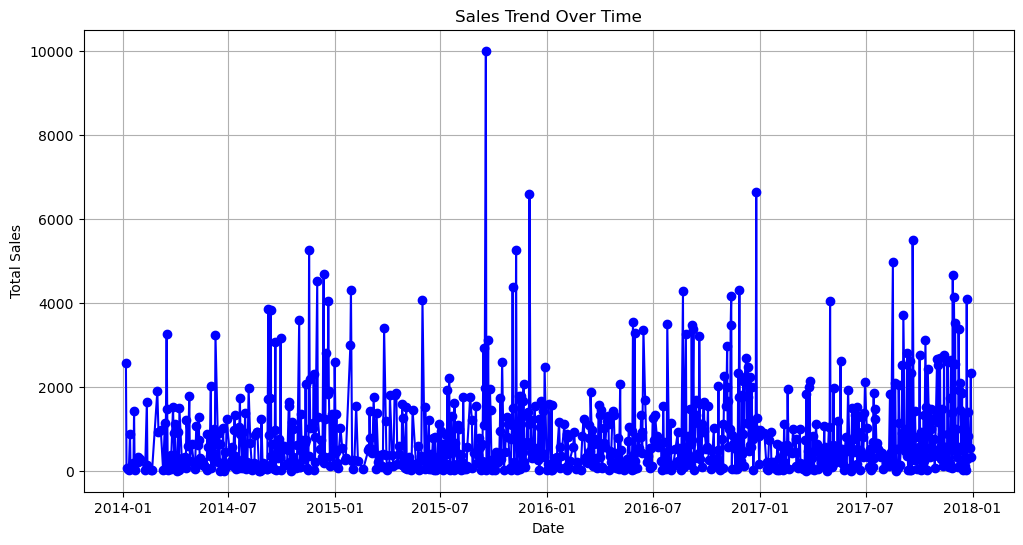

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(sales_time_series["Order Date"], sales_time_series["Sales"], marker='o', linestyle='-', color='blue')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.grid()
plt.show()


In [35]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
train_size = int(len(sales_time_series) * 0.8)
train_data, test_data = sales_time_series[:train_size], sales_time_series[train_size:]

print(f"Train Data: {len(train_data)} rows, Test Data: {len(test_data)} rows")


Train Data: 711 rows, Test Data: 178 rows


In [37]:
pip install pandas numpy matplotlib seaborn prophet


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 47.6 MB/s eta 0:00:00 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 11.4 MB/s eta 0:00:000:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd

# Load your dataset (modify path accordingly)
file_path = "/home/df14fb8b-77ef-43c6-8fe3-d7498cb9de6e/.cache/kagglehub/datasets/tanayatipre/store-sales-forecasting-dataset/versions/1/stores_sales_forecasting.csv"  # Update this with actual file path
sales_data = pd.read_csv(file_path, encoding="latin1")

# Convert 'Order Date' to datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], errors='coerce')

# Remove any null dates (if conversion fails for any row)
sales_data = sales_data.dropna(subset=['Order Date'])

# Aggregate sales per day
daily_sales = sales_data.groupby('Order Date', as_index=False)['Sales'].sum()

# Rename columns for Prophet compatibility
daily_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)

# Display dataset after cleaning
print(daily_sales.head())


          ds         y
0 2014-01-06  2573.820
1 2014-01-07    76.728
2 2014-01-10    51.940
3 2014-01-11     9.940
4 2014-01-13   879.939


20:50:07 - cmdstanpy - INFO - Chain [1] start processing
20:50:07 - cmdstanpy - INFO - Chain [1] done processing


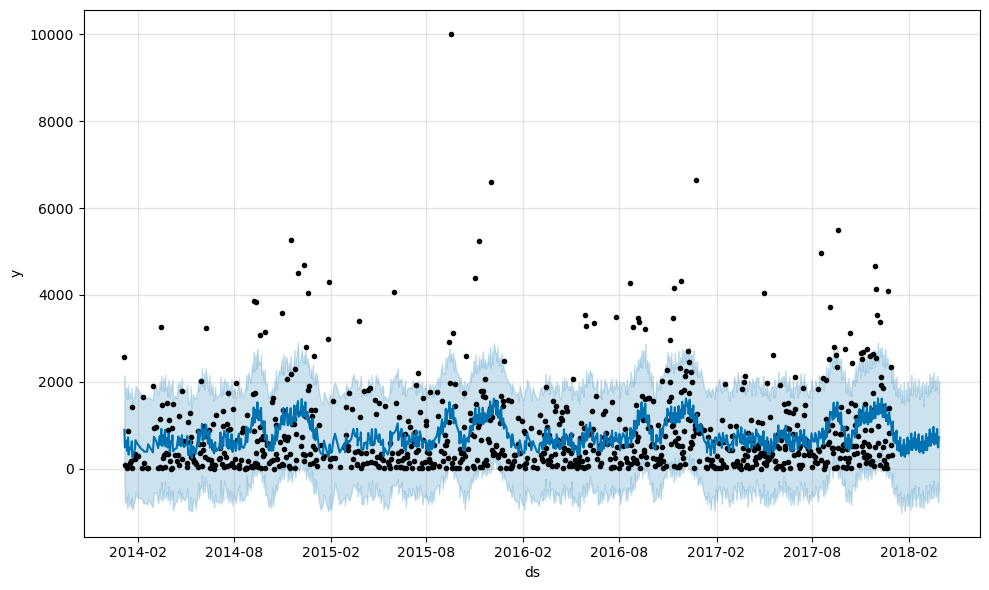

            ds        yhat  yhat_lower   yhat_upper
974 2018-03-26  915.887987 -311.445862  2142.027081
975 2018-03-27  528.168354 -748.528384  1763.580951
976 2018-03-28  488.762816 -772.993671  1734.433973
977 2018-03-29  695.077608 -485.574120  2019.308383
978 2018-03-30  722.312738 -508.605955  1986.768982


In [54]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Initialize Prophet model
model = Prophet()

# Fit model on data
model.fit(daily_sales)

# Create future dates for prediction (next 3 months)
future = model.make_future_dataframe(periods=90)

# Generate forecast
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.show()

# Display forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


In [58]:
conda install -c anaconda sqlite


Channels:
 - anaconda
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/anaconda-ai-2024.04-py310

  added / updated specs:
    - sqlite


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.2.25  |       h06a4308_0         136 KB  anaconda
    certifi-2025.1.31          |  py310h06a4308_0         163 KB  anaconda
    sqlite-3.45.3              |       h5eee18b_0         1.6 MB  anaconda
    ------------------------------------------------------------
                                           Total:         1.9 MB

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2024.3.11-~ --> anaconda::ca-certificates-2025.2.25-h06a4308_0 
  certifi            pkgs/main::certifi-2024.2.2-py310h06a~ --> anaconda::certifi-2025.1.31-py310h06a4308_0 
  sqlite                pkgs/ma

In [60]:
import sqlite3
import pandas as pd


In [66]:
# Load dataset
#df = pd.read_csv("/home/df14fb8b-77ef-43c6-8fe3-d7498cb9de6e/.cache/kagglehub/datasets/tanayatipre/store-sales-forecasting-dataset/versions/1/stores_sales_forecasting.csv")  # Replace with actual file name
df = pd.read_csv(f"{path}/stores_sales_forecasting.csv", encoding=enc)
# Show first few rows
print(df.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region       Product ID

In [68]:
# Create SQLite database (creates a file in your directory)
conn = sqlite3.connect("sales_data.db")  # This will create a database file
cursor = conn.cursor()


In [70]:
df.to_sql("sales_table", conn, if_exists="replace", index=False)


2121

In [72]:
# Example 1: Get Total Sales by Month
query = """
SELECT 
    strftime('%Y-%m', "Order Date") AS Month, 
    SUM(Sales) AS Total_Sales, 
    SUM(Profit) AS Total_Profit
FROM sales_table
GROUP BY Month
ORDER BY Month;
"""

result = pd.read_sql(query, conn)
print(result)


  Month  Total_Sales  Total_Profit
0  None  741999.7953    18451.2728


In [74]:
# Example 2: Best-Selling Products
query = """
SELECT 
    "Product Name", 
    SUM(Sales) AS Total_Sales, 
    SUM(Quantity) AS Total_Quantity
FROM sales_table
GROUP BY "Product Name"
ORDER BY Total_Sales DESC
LIMIT 10;
"""

result = pd.read_sql(query, conn)
print(result)


                                        Product Name  Total_Sales  \
0       HON 5400 Series Task Chairs for Big and Tall   21870.5760   
1  Riverside Palais Royal Lawyers Bookcase, Royal...   15610.9656   
2         Bretford Rectangular Conference Table Tops   12995.2915   
3      Global Troy Executive Leather Low-Back Tilter   12975.3820   
4                           SAFCO Arco Folding Chair   11572.7800   
5              DMI Eclipse Executive Suite Bookcases   11046.6090   
6  Hon Deluxe Fabric Upholstered Stacking Chairs,...   10637.5280   
7  Chromcraft Bull-Nose Wood Oval Conference Tabl...    9917.6400   
8  Bush Advantage Collection Racetrack Conference...    9544.7250   
9         GuestStacker Chair with Chrome Finish Legs    9070.9440   

   Total_Quantity  
0              39  
1              24  
2              46  
3              32  
4              53  
5              27  
6              51  
7              27  
8              33  
9              31  


In [86]:
import shutil
shutil.move("/home/df14fb8b-77ef-43c6-8fe3-d7498cb9de6e/sales_data.db", "/Users/manishankar/Downloads/sales_data.db")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/manishankar/Downloads/sales_data.db'

In [88]:
import os
print(os.listdir("."))


['.jupyter', '.bashrc', '.config', '.conda', 'anaconda_projects', '.npm', 'Untitled1.ipynb', '.ipython', 'README.ipynb', '.pythonstartup.py', '.local', '.profile', '.virtualenvs', '.anaconda', '.ipynb_checkpoints', '.gitconfig', '.cache', 'Untitled.ipynb', 'sales_data.db', '.vimrc']


In [90]:
import os
for root, dirs, files in os.walk("/"):
    if "sales_data.db" in files:
        print(f"Found at: {os.path.join(root, 'sales_data.db')}")


Found at: /home/df14fb8b-77ef-43c6-8fe3-d7498cb9de6e/sales_data.db


In [94]:
import sqlite3

# Connect to the database
db_path = "/Users/manishankar/Downloads/sales_data.db"  # Update path if needed
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Example: Show all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:", tables)

# Example: Run a sample query (Replace with your actual query)
cursor.execute("SELECT * FROM sales LIMIT 5;")  # Modify based on table name
rows = cursor.fetchall()

for row in rows:
    print(row)

# Close the connection
conn.close()


OperationalError: unable to open database file